In [1]:
# memory leak issue


In [2]:
!pip install 'transformers[torch]' --quiet
!pip install timm gdown

In [3]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image, ImageOps
import requests
from time import perf_counter
import numpy as np

url = "https://github.com/Isalia20/DETR-finetune/blob/main/IMG_3507.jpg?raw=true"
image = Image.open(requests.get(url, stream=True).raw)
image = ImageOps.exif_transpose(image)

# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-101-dc5")
model = DetrForObjectDetection.from_pretrained("isalia99/detr-resnet-101-dc5-sku110k")
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = model.eval().to(device)


def detect_objects(image,thres=0.8):
  inputs = processor(images=image, return_tensors="pt").to(device)
  # print(type(inputs))
  outputs = model(**inputs)

  # convert outputs (bounding boxes and class logits) to COCO API
  # let's only keep detections with score > 0.8
  target_sizes = torch.tensor([image.size[::-1]])
  results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=thres)[0]
  # outputs.detach()
  results["scores"]=results["scores"].cpu().detach()
  results["boxes"]=results["boxes"].cpu().detach()
  results["labels"]=results["labels"].cpu().detach()
  return results

t=perf_counter()
results = detect_objects(image)
end_t=perf_counter()
print(f"{len(results['boxes'])} objects found")
print("time:-",end_t-t)

# for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
#         box = [round(i, 2) for i in box.tolist()]
#         print(
#                 f"Detected {model.config.id2label[label.item()]} with confidence "
#                 f"{round(score.item(), 3)} at location {box}"
#         )

2024-04-12 11:56:21.927639: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 11:56:21.927752: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 11:56:22.055580: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/243M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/179M [00:00<?, ?B/s]

140 objects found
time:- 1.5896401350000247


140 objects found
time:- 0.2817066899999645


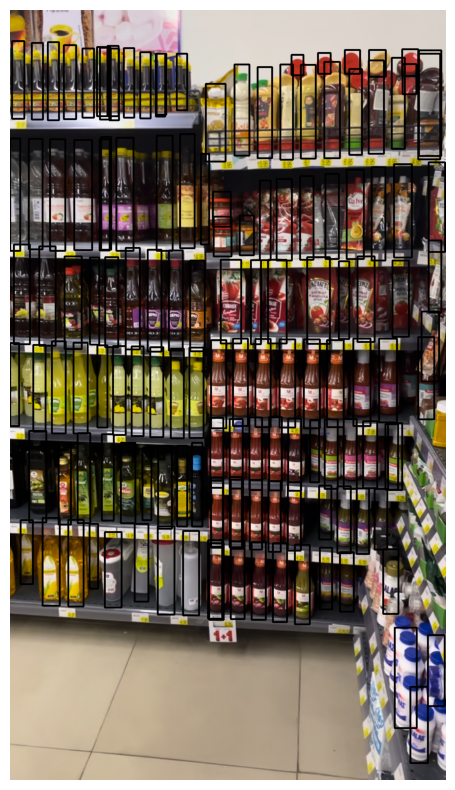

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# image = Image.open("J6R17B.jpg")
# image = cv2.imread("159163635.jpg")
# image = Image.open("shelve.jpg")
image_array=np.array(image)

t=perf_counter()
results = detect_objects(image,thres=0.8)
end_t=perf_counter()
print(f"{len(results['boxes'])} objects found")
print("time:-",end_t-t)

for box_tensor in results['boxes']:
  box = box_tensor.numpy().astype("int32")
  image_array = cv2.rectangle(image_array,(box[0],box[1]),(box[2],box[3]),(0,0,0),4)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(image_array)
plt.show()

In [5]:
image.size

(1170, 2070)

In [6]:
# 30 sec for 100 frames
# 30 fps 10 minutes video
# 30*10*60=18000

In [7]:
fps = 5
duration = 10 # minutes
frames = fps * duration * 60
speed = 100 / 30
time = frames/speed

(time)/60

15.0

In [8]:
# for i in range(100):
#   t=perf_counter()
#   results = detect_objects(image)
#   end_t=perf_counter()
#   print(f"{len(results['boxes'])} objects found")
#   print("time:-",end_t-t)

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
# !gdown https://drive.google.com/uc?id=1W9Ezz-arQxwhp2fYFRQ6AaJlwknEpbsL
# !gdown https://drive.google.com/drive/u/1/folders/1W9Ezz-arQxwhp2fYFRQ6AaJlwknEpbsL

import gdown
gdown.download_folder("https://drive.google.com/drive/u/1/folders/1W9Ezz-arQxwhp2fYFRQ6AaJlwknEpbsL", quiet=False)

Retrieving folder contents


Processing file 1vrHN7z6x7AbwXe9APFkoh9X-g2h0DtHQ IMG_0453.MOV
Processing file 1Y87AmDkks3icYpZ7UdisTfjUZ9tMSbkW IMG_0475.MOV
Processing file 1jMPV0xHroctZ_gFlrPfMcn_0JmzNS9Lz IMG_0486.JPG
Processing file 1Xe8RDsdGaaQye81yJH2ZNkNBLSd9Le7c IMG_0488.JPG
Processing file 1Oae86uTuXxfrMfXIGNHKyY6QKSfClWlg IMG_0491.mov
Processing file 16wC8h6t9Q3Nb90_cWL8OkgtOHjfXMYDO IMG_0491.mov
Processing file 1NlMr0ejuGJqrHPwC2VWooWx7aoXMM6f- IMG_0492.MOV
Processing file 1w0tK3w6FZy3HDqhwY1Ukpadsvk-I0fgi IMG_0493.MOV
Processing file 19gbspyjfbDmOQ1wp8CcV2CVFrTWn_kyN IMG_0493.MOV


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1vrHN7z6x7AbwXe9APFkoh9X-g2h0DtHQ
From (redirected): https://drive.google.com/uc?id=1vrHN7z6x7AbwXe9APFkoh9X-g2h0DtHQ&confirm=t&uuid=2a03de85-f54c-4220-919a-1ce09eafc098
To: /kaggle/working/KiranaVideo/IMG_0453.MOV
100%|██████████| 329M/329M [00:06<00:00, 47.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Y87AmDkks3icYpZ7UdisTfjUZ9tMSbkW
From (redirected): https://drive.google.com/uc?id=1Y87AmDkks3icYpZ7UdisTfjUZ9tMSbkW&confirm=t&uuid=0a8dc4f0-2699-4924-953a-3a3769a93216
To: /kaggle/working/KiranaVideo/IMG_0475.MOV
100%|██████████| 443M/443M [00:06<00:00, 64.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jMPV0xHroctZ_gFlrPfMcn_0JmzNS9Lz
To: /kaggle/working/KiranaVideo/IMG_0486.JPG
100%|██████████| 5.22M/5.22M [00:00<00:00, 23.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1

['/kaggle/working/KiranaVideo/IMG_0453.MOV',
 '/kaggle/working/KiranaVideo/IMG_0475.MOV',
 '/kaggle/working/KiranaVideo/IMG_0486.JPG',
 '/kaggle/working/KiranaVideo/IMG_0488.JPG',
 '/kaggle/working/KiranaVideo/IMG_0491.mov',
 '/kaggle/working/KiranaVideo/IMG_0491.mov',
 '/kaggle/working/KiranaVideo/IMG_0492.MOV',
 '/kaggle/working/KiranaVideo/IMG_0493.MOV',
 '/kaggle/working/KiranaVideo/IMG_0493.MOV']

In [11]:
!ls KiranaVideo

IMG_0453.MOV  IMG_0486.JPG  IMG_0491.mov  IMG_0493.MOV
IMG_0475.MOV  IMG_0488.JPG  IMG_0492.MOV


In [12]:
from glob import glob
from pathlib import Path

video_formats = [".mov",".mp4",".mkv"]
image_formats = [".jpg",".png",".jpeg",".webp"]


base_dir = "KiranaVideo"
all_list = glob(f"{base_dir}/*")
video_list = list(filter(lambda x: Path(x).suffix.lower() in video_formats, all_list))
image_list = list(filter(lambda x: Path(x).suffix.lower() in image_formats, all_list))

video_list,image_list

(['KiranaVideo/IMG_0453.MOV',
  'KiranaVideo/IMG_0475.MOV',
  'KiranaVideo/IMG_0491.mov',
  'KiranaVideo/IMG_0493.MOV',
  'KiranaVideo/IMG_0492.MOV'],
 ['KiranaVideo/IMG_0486.JPG', 'KiranaVideo/IMG_0488.JPG'])

## adding video frames

In [13]:
import cv2
import os,shutil
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm


frames_dir = Path("frames/")

def get_frames(video_paths,frame_interval=10):
    
    if isinstance(video_paths,str): video_paths = [video_paths]
        
    if os.path.exists(frames_dir): shutil.rmtree(frames_dir)
    os.makedirs(frames_dir)    
    
    
    for video_path in video_paths:
        
        
        video_obj = cv2.VideoCapture(video_path)
        total_frames = int(video_obj.get(cv2.CAP_PROP_FRAME_COUNT))
        video_path = Path(video_path)
        
        print(f"Video Name: {video_path}")
        print(f"Total frames in the video: {total_frames}")
        print(f"Extracting every {frame_interval}th frame...")

        for i in tqdm(range(total_frames)):
            
            ret, frame = video_obj.read()
            
            # If frame read is unsuccessful, break the loop
            if not ret:
                print("frame unsuccessful")
                break
            
            if (i+1) % frame_interval == 0:
                img_name = Path(f"{video_path.stem}_frame_{i+1}.jpg")
                img_path = str(frames_dir / img_name)

#                 print(img_path)
                cv2.imwrite(img_path, frame)
                
        video_obj.release()

    
get_frames(video_list, frame_interval=10)

Video Name: KiranaVideo/IMG_0453.MOV
Total frames in the video: 5074
Extracting every 10th frame...


100%|██████████| 5074/5074 [00:58<00:00, 86.98it/s]


Video Name: KiranaVideo/IMG_0475.MOV
Total frames in the video: 6824
Extracting every 10th frame...


100%|██████████| 6824/6824 [01:21<00:00, 83.64it/s]


Video Name: KiranaVideo/IMG_0491.mov
Total frames in the video: 563
Extracting every 10th frame...


100%|██████████| 563/563 [00:25<00:00, 22.13it/s]


Video Name: KiranaVideo/IMG_0493.MOV
Total frames in the video: -9223372036854775808
Extracting every 10th frame...


0it [00:00, ?it/s]


Video Name: KiranaVideo/IMG_0492.MOV
Total frames in the video: -9223372036854775808
Extracting every 10th frame...


0it [00:00, ?it/s]


In [14]:
print("total number of frames:",len(os.listdir(frames_dir)))

total number of frames: 1245


## adding image frames

In [15]:
# import shutil
for path in tqdm(image_list):
    shutil.copy(path,frames_dir / Path(path).name)

100%|██████████| 2/2 [00:00<00:00, 225.89it/s]


In [16]:
print("total number of frames:",len(os.listdir(frames_dir)))

total number of frames: 1247


In [17]:
import cv2,shutil,os
from glob import glob
from pathlib import Path
from tqdm import tqdm

crops_dir = Path("crops/")
detections_dir = Path("detections/")

def create_crops(image_paths):

    if os.path.exists(crops_dir): shutil.rmtree(crops_dir)
    os.makedirs(crops_dir)
    
    if os.path.exists(detections_dir): shutil.rmtree(detections_dir)
    os.makedirs(detections_dir)

    for image_path in tqdm(image_paths):

        image_path = Path(image_path)
        image = Image.open(image_path).convert("RGB")
        image_array=np.array(image)

        results = detect_objects(image)
        
    
        for i,box_tensor in enumerate(results['boxes']):
            box = box_tensor.numpy().astype("int32")
            
            # make boxes on the image
            image_array = cv2.rectangle(image_array,(box[0],box[1]),(box[2],box[3]),(0,0,0),4)
            
            try:
                crop = image_array[box[1]:box[3],box[0]:box[2]]
                filename = crops_dir / Path(f"{image_path.stem}__crop_{i}{image_path.suffix}")
                filename = str(filename)
                # print(filename)
                cv2.imwrite(filename,crop[:,:,::-1])
            except Exception as e:
                pass
#                 print("error:",e)
        
        # save detections too
        cv2.imwrite(str(detections_dir / Path(image_path.name)),image_array[:,:,::-1])

In [18]:
create_crops(glob(str(frames_dir)+"/*")[:2])

100%|██████████| 2/2 [00:00<00:00,  2.32it/s]


In [19]:
create_crops(glob(str(frames_dir)+"/*"))

100%|██████████| 1247/1247 [08:17<00:00,  2.51it/s]


In [20]:
len(os.listdir("crops/"))

43583

In [21]:
!zip -r crops.zip crops/ --quiet

In [22]:
!zip -r frames.zip frames/ --quiet

In [23]:
!zip -r detections.zip detections/ --quiet

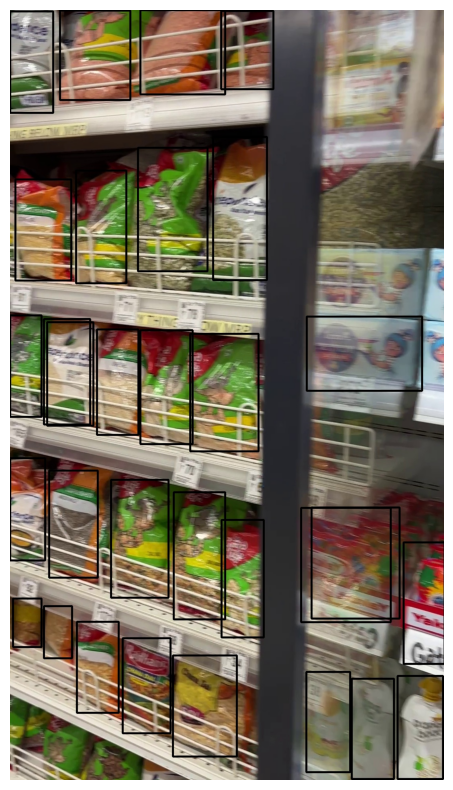

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = Image.open(glob(f"{detections_dir}/*")[0])
image_array=np.array(image)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(image_array)
plt.show()

In [25]:
! rm -r KiranaVideo

## The End 
Have a Nice Day